In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(12,12))
plt.style.use('fivethirtyeight')

<Figure size 864x864 with 0 Axes>

In [44]:
bear_df = pd.read_csv('data/idv_team_data/CHI.csv', index_col='datetime')
bear_df.drop('Unnamed: 0', axis = 1, inplace= True)
bear_df.head()

,team,season,opp,day_week,week,W/L,ot,record,home/away,team_score,...,team_rush_yards,team_turnover,1D_allowed,opp_total_yards,opp_pass_yards,opp_rush_yards,opp_turnover,offense_expected_points,defense_expected_points,sp_expected_points
datetime,,,,,,,,,,,,,,,,,,,,,
2002-09-08 13:04:00,CHI,2002,MIN,Sun,1,1,0.0,1-0,HOME,27.0,...,80.0,2.0,19.0,368.0,228.0,140.0,3.0,6.37,-1.20,1.01
2002-09-15 13:04:00,CHI,2002,ATL,Sun,2,1,0.0,2-0,AWAY,14.0,...,106.0,2.0,19.0,257.0,135.0,122.0,3.0,-9.67,8.39,3.54
2002-09-22 13:05:00,CHI,2002,NOR,Sun,3,0,0.0,2-1,HOME,23.0,...,125.0,2.0,18.0,302.0,229.0,73.0,3.0,0.58,-0.64,-6.03
2002-09-29 13:04:00,CHI,2002,BUF,Sun,4,0,1.0,2-2,AWAY,27.0,...,52.0,0.0,26.0,410.0,307.0,103.0,1.0,3.14,-7.40,0.06
2002-10-07 21:08:00,CHI,2002,GNB,Mon,5,0,0.0,2-3,HOME,21.0,...,45.0,4.0,20.0,457.0,333.0,124.0,1.0,-12.87,-3.38,8.55


In [45]:
for i in bear_df.columns:
    print(i)

team
season
opp
day_week
week
W/L
ot
record
home/away
team_score
opp_score
1D_gained
team_total_yards
team_pass_yards
team_rush_yards
team_turnover
1D_allowed
opp_total_yards
opp_pass_yards
opp_rush_yards
opp_turnover
offense_expected_points
defense_expected_points
sp_expected_points


In [46]:
group_season = bear_df.groupby('season')

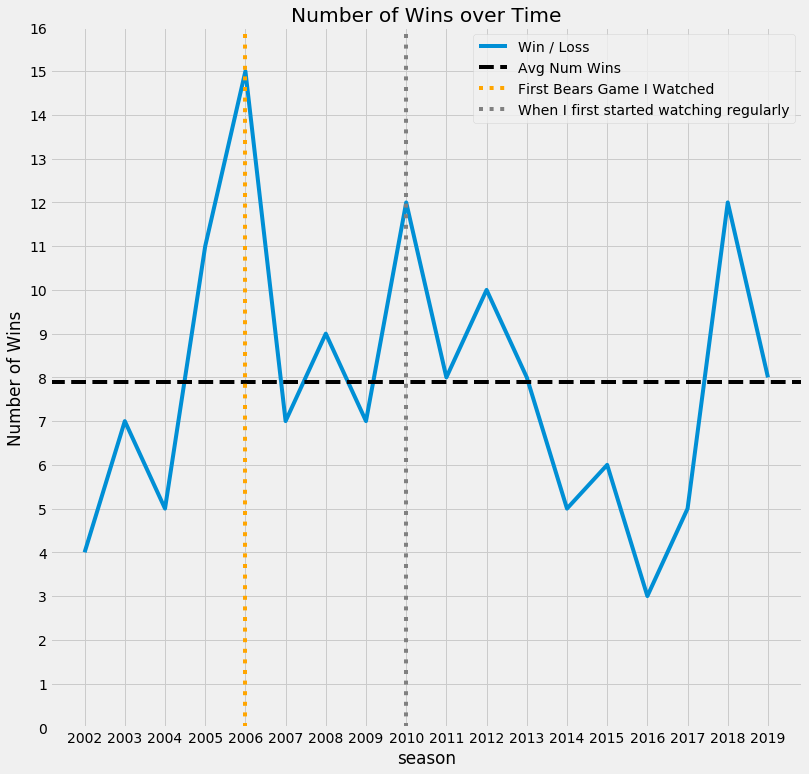

In [89]:
group_season['W/L'].sum().plot(kind='line', figsize=(12,12), label='Win / Loss')
plt.title('Number of Wins over Time')
plt.ylabel('Number of Wins')
plt.yticks(range(0,17))
plt.xticks(range(2002, 2020))
plt.axhline(group_season['W/L'].sum().mean(), linestyle='--', color='black', label='Avg Num Wins')
plt.axvline(2006, linestyle=':', color='orange', label='First Bears Game I Watched')
plt.axvline(2010, linestyle=':', color='grey', label='When I first started watching regularly')

plt.legend()
plt.savefig('bears_record_over_time.jpeg')
plt.show()


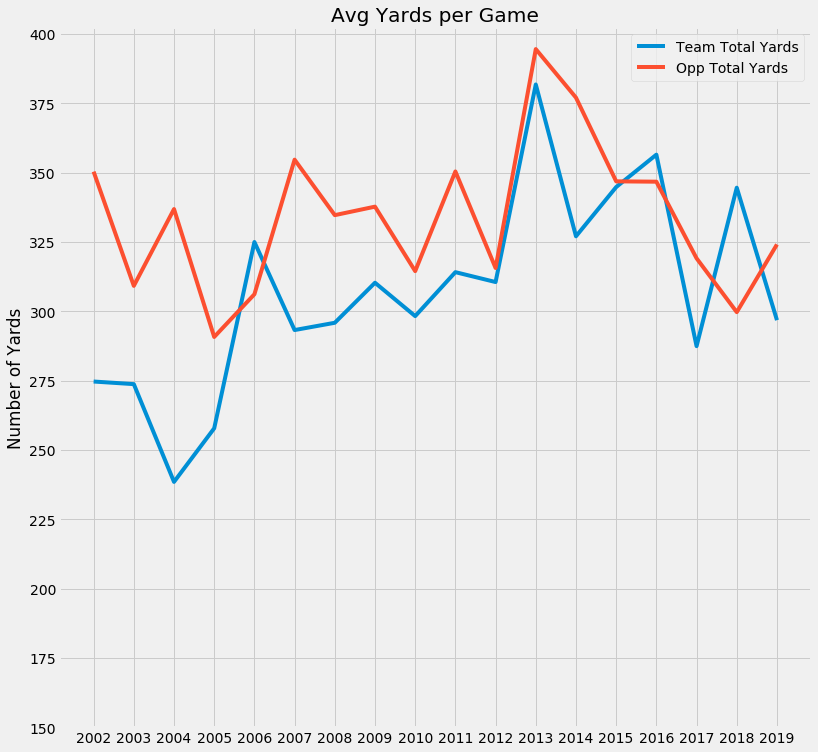

In [86]:
fig, ax = plt.subplots(figsize=(12,12))
plt.plot(group_season['team_total_yards'].mean(), label='Team Total Yards')
plt.plot(group_season['opp_total_yards'].mean(), label ='Opp Total Yards')


plt.yticks(range(150, 425, 25))
plt.xticks(range(2002, 2020))
plt.title('Avg Yards per Game')
plt.ylabel('Number of Yards')

plt.legend()
plt.show()

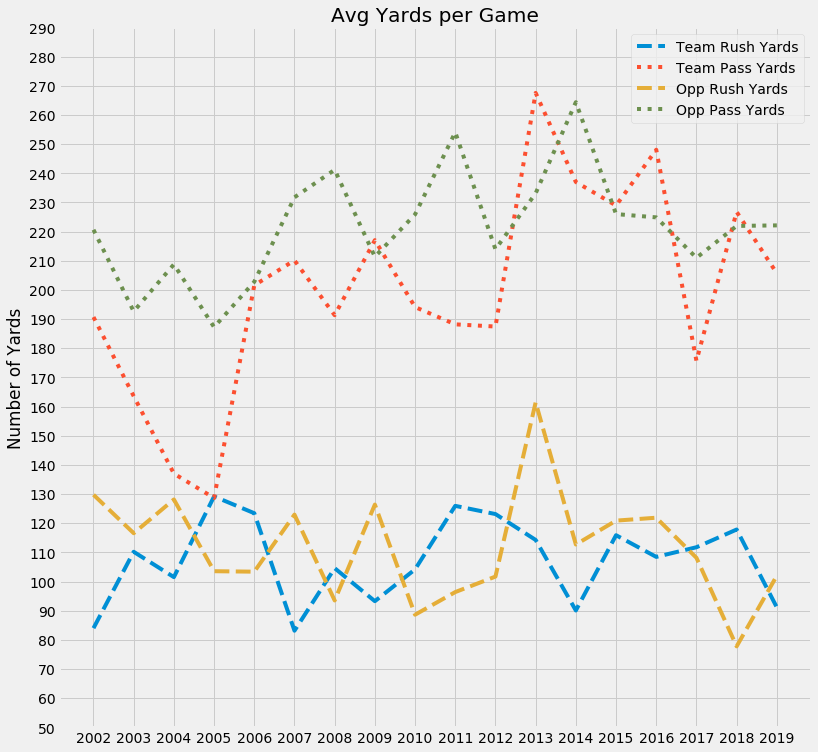

In [78]:
plt.subplots(figsize=(12,12))
plt.plot(group_season['team_rush_yards'].mean(), label='Team Rush Yards', linestyle='--')
plt.plot(group_season['team_pass_yards'].mean(), label='Team Pass Yards', linestyle=':')
plt.plot(group_season['opp_rush_yards'].mean(), label='Opp Rush Yards', linestyle='--')
plt.plot(group_season['opp_pass_yards'].mean(), label='Opp Pass Yards', linestyle=':')

plt.yticks(range(50,300, 10))
plt.xticks(range(2002, 2020))
plt.title('Avg Yards per Game')
plt.ylabel('Number of Yards')

plt.legend()
plt.show()

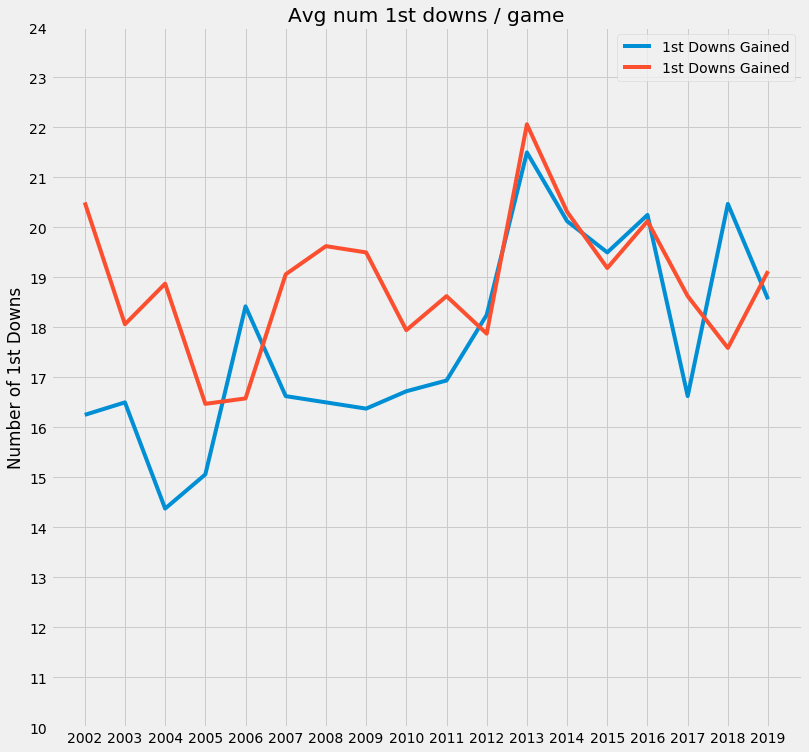

In [67]:
fig, ax = plt.subplots(figsize=(12,12))
plt.plot(group_season['1D_gained'].mean(), label='1st Downs Gained')
plt.plot(group_season['1D_allowed'].mean(), label='1st Downs Gained')
plt.yticks(range(10,25, 1))
plt.xticks(range(2002, 2020))
plt.title('Avg num 1st downs / game')
plt.ylabel('Number of 1st Downs')

plt.legend()
plt.show()

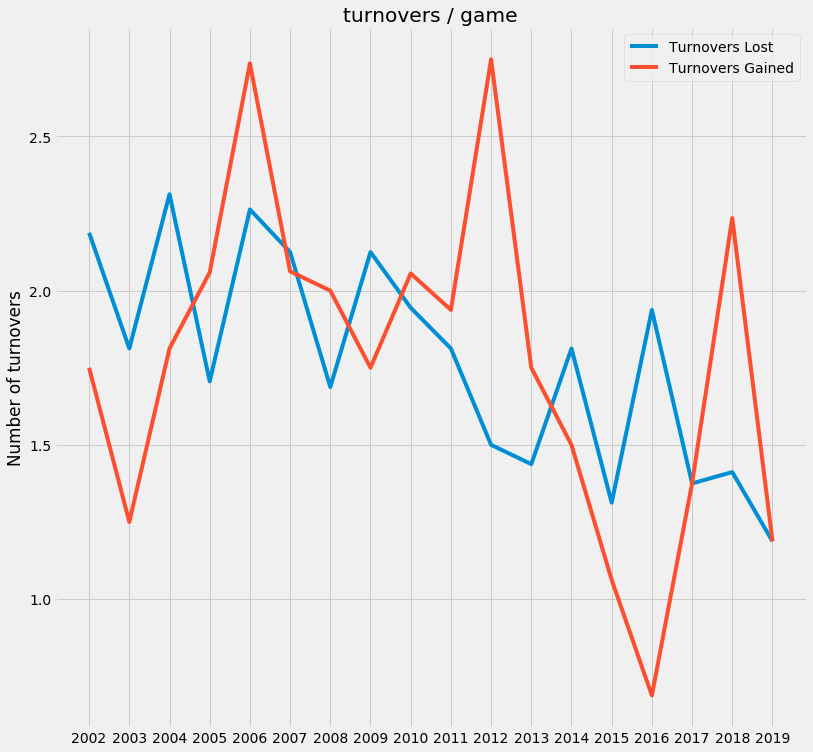

In [83]:
fig, ax = plt.subplots(figsize=(12,12))
plt.plot(group_season['team_turnover'].mean(), label='Turnovers Lost')
plt.plot(group_season['opp_turnover'].mean(), label='Turnovers Gained')

plt.xticks(range(2002, 2020))

plt.title('turnovers / game')
plt.ylabel('Number of turnovers')

plt.legend()
plt.show()

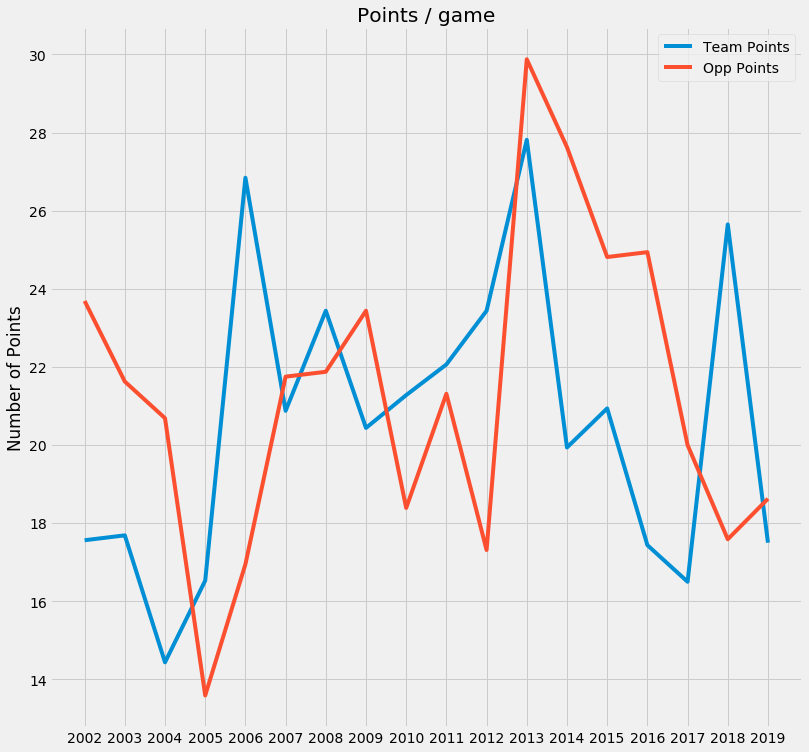

In [84]:
fig, ax = plt.subplots(figsize=(12,12))
plt.plot(group_season['team_score'].mean(), label='Team Points')
plt.plot(group_season['opp_score'].mean(), label='Opp Points')

plt.xticks(range(2002, 2020))

plt.title('Points / game')
plt.ylabel('Number of Points')

plt.legend()
plt.show()